In [139]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston,load_iris,load_breast_cancer
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.metrics import accuracy_score,r2_score
import dtreeviz
import graphviz
from IPython.core.display import display, HTML
import graphviz.backend as be


In [122]:
data=load_boston()

In [123]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [124]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [125]:
df['target'] = data.target

In [126]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [127]:
df.shape

(506, 14)

In [128]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [129]:
from sklearn.model_selection import train_test_split , cross_val_score

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [131]:
X_test.shape

(102, 13)

## Regression Problem

In [133]:
regr = tree.DecisionTreeRegressor(criterion='mse',max_depth=5)
boston = load_boston()

X_train = boston.data
y_train = boston.target
regr.fit(X_train, y_train)

y_pred=regr.predict(X_test)
r2_score(y_test,y_pred)


0.9291767406460653

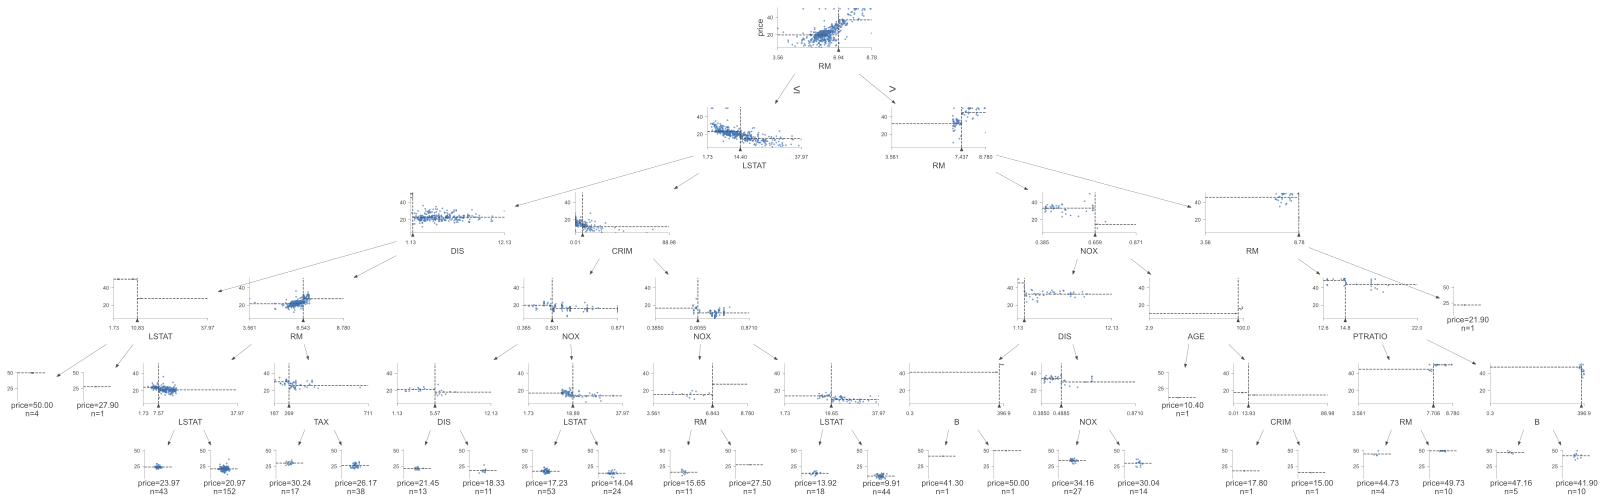

In [136]:
viz_model=dtreeviz.model(regr,
               X_train,
               y_train,
               target_name='price',
               feature_names=boston.feature_names,
               )

viz_model.view(scale=.9,fancy=True)

## Classification Problem

In [137]:
clas = tree.DecisionTreeClassifier()  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)
y_pred=clas.predict(X_train)
accuracy_score(y_train,y_pred)

1.0

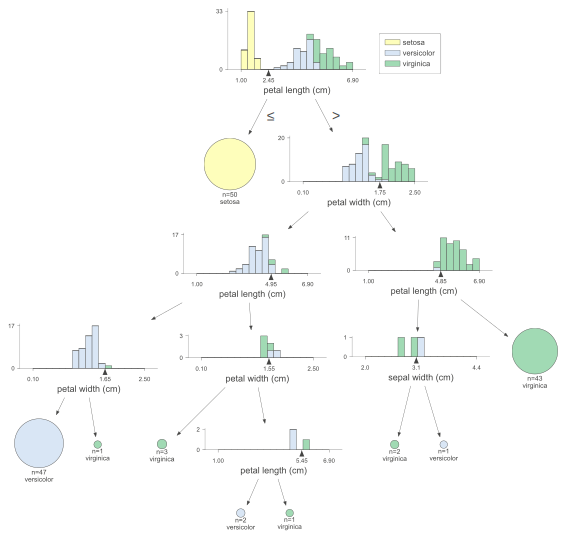

In [138]:
viz = dtreeviz.model(clas, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"])
viz.view()

In [147]:
clas = tree.DecisionTreeClassifier()  
cancer = load_breast_cancer()

X_train = cancer.data
y_train = cancer.target
clas.fit(X_train, y_train)
y_pred=clas.predict(X_train)
accuracy_score(y_train,y_pred)

1.0

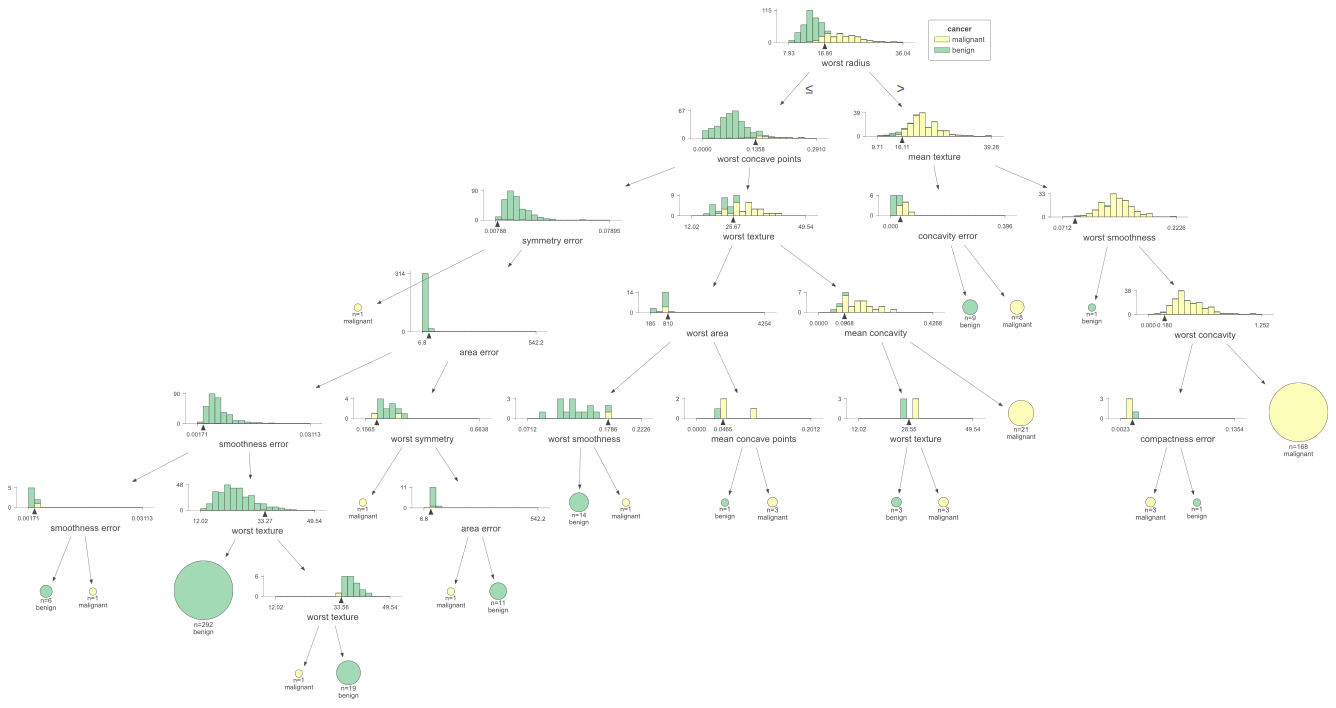

In [149]:
viz = dtreeviz.model(clas, 
               X_train,
               y_train,
            target_name='cancer',
               feature_names=cancer.feature_names, 
               class_names=list(cancer.target_names) 
                    )

viz.view(scale=1)